
# 📊 Sales & Revenue Analysis Project

## 🎯 Business Problem
The objective of this project is to analyze sales performance across regions, product categories, and customer demographics to identify growth drivers and profitability segments.

---

## 📦 Dataset Overview
The dataset contains transactional sales data including:
- Date
- Region
- Product Category
- Revenue
- Profit
- Discount
- Customer Age

The analysis explores trends, segmentation, and profitability patterns to generate business insights.


In [ ]:

# Setup Configuration (Professional Notebook Cleanup)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'



---
# 📈 Key Performance Indicators (KPIs)

This section calculates:
- Total Revenue
- Total Profit
- Overall Profit Margin
- Total Orders



---
# 📊 Time Trend Analysis

Analyzing monthly revenue trends to identify seasonality and growth patterns.



---
# 🌍 Regional Performance Analysis

Evaluating revenue, profit, and order volume across regions.



---
# 👥 Customer Demographics Analysis

Segmenting customers by age group to understand revenue contribution and profitability patterns.



---
# 💸 Discount Impact Analysis

Analyzing the relationship between discount levels and profitability.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'
from datetime import datetime, timedelta

plt.style.use('seaborn-v0_8')

In [2]:
data = pd.read_csv("data/sales.csv")

In [3]:
data

,Order ID,Order Date,Customer ID,Age,Gender,City,Region,Product ID,Product Category,Product Name,Unit Price,Quantity,Discount,Revenue,Cost Price,Profit
0,ORD1,10/16/24,CUST2044,56,Female,Delhi,North,PROD221,Electronics,Mobile,18852.10,5,0.06,88604.87,14985.96,13675.05
1,ORD2,4/25/23,CUST1871,41,Female,Pune,West,PROD230,Clothing,T-Shirt,7968.53,3,0.14,20558.81,5445.91,4221.08
2,ORD3,1/26/23,CUST1385,38,Female,Hyderabad,South,PROD260,Clothing,Jacket,1225.11,2,0.22,1911.17,1022.52,-133.88
3,ORD4,10/9/23,CUST2082,59,Female,Delhi,North,PROD575,Clothing,Shoes,15351.26,5,0.13,66777.98,10328.44,15135.78
4,ORD5,9/8/23,CUST2528,20,Female,Chennai,South,PROD584,Electronics,Tablet,48693.02,3,0.11,130010.36,41184.93,6455.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ORD4996,11/10/24,CUST2741,53,Female,Chennai,South,PROD601,Home Appliances,Fan,21854.94,5,0.22,85234.27,13422.16,18123.46
4996,ORD4997,11/23/24,CUST2601,42,Male,Hyderabad,South,PROD375,Grocery,Rice Bag,38169.56,2,0.14,65651.64,23459.11,18733.43
4997,ORD4998,10/18/24,CUST1377,59,Female,Delhi,North,PROD933,Electronics,Laptop,30742.08,5,0.26,113745.70,23376.62,-3137.40
4998,ORD4999,1/30/24,CUST1719,49,Female,Hyderabad,South,PROD229,Home Appliances,Fan,4551.37,5,0.05,21619.01,3000.05,6618.78


In [4]:
#tells the number of rows & columns
data.shape 

(5000, 16)

In [5]:
#gives general info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          5000 non-null   object 
 1   Order Date        5000 non-null   object 
 2   Customer ID       5000 non-null   object 
 3   Age               5000 non-null   int64  
 4   Gender            5000 non-null   object 
 5   City              5000 non-null   object 
 6   Region            5000 non-null   object 
 7   Product ID        5000 non-null   object 
 8   Product Category  5000 non-null   object 
 9   Product Name      5000 non-null   object 
 10  Unit Price        5000 non-null   float64
 11  Quantity          5000 non-null   int64  
 12  Discount          5000 non-null   float64
 13  Revenue           5000 non-null   float64
 14  Cost Price        5000 non-null   float64
 15  Profit            5000 non-null   float64
dtypes: float64(5), int64(2), object(9)
memory 

In [6]:
data.describe()

,Age,Unit Price,Quantity,Discount,Revenue,Cost Price,Profit
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,41.028000,25019.691720,2.990200,0.149646,63456.698510,18138.940458,9215.674030
std,13.508979,14325.612894,1.420179,0.087030,50190.665202,10531.919229,12834.588144
min,18.000000,206.230000,1.000000,0.000000,163.140000,145.740000,-31632.880000
25%,30.000000,12806.677500,2.000000,0.070000,23076.112500,9230.562500,948.915000
50%,41.000000,25171.935000,3.000000,0.150000,50785.805000,18146.055000,5195.340000
75%,53.000000,37435.662500,4.000000,0.220000,94460.162500,26768.802500,14164.645000
max,64.000000,49988.770000,5.000000,0.300000,247952.950000,41703.320000,93722.130000


In [7]:
data.isnull().sum()

Order ID            0
Order Date          0
Customer ID         0
Age                 0
Gender              0
City                0
Region              0
Product ID          0
Product Category    0
Product Name        0
Unit Price          0
Quantity            0
Discount            0
Revenue             0
Cost Price          0
Profit              0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [ ]:
#change the type of date from string to datateime variable
data['Order Date'] = pd.to_datetime(data['Order Date'])

/var/folders/c7/pjn5fzf55b5fj4ml_2md5k7r0000gn/T/ipykernel_5392/2966077312.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Order Date'] = pd.to_datetime(data['Order Date'])


In [10]:
# Creating Executive KPIs
total_revenue = data['Revenue'].sum()
total_profit = data['Profit'].sum()
total_orders = data['Order ID'].nunique()
avg_order_value = total_revenue / total_orders

print("Total Revenue:", round(total_revenue, 2))
print("Total Profit:", round(total_profit, 2))
print("Total Orders:", total_orders)
print("Average Order Value:", round(avg_order_value, 2))

Total Revenue: 317283492.55
Total Profit: 46078370.15
Total Orders: 5000
Average Order Value: 63456.7


In [11]:
# Profit Margin
overall_margin = total_profit / total_revenue
print("Overall Profit Margin:", round(overall_margin * 100, 2), "%")

Overall Profit Margin: 14.52 %


In [12]:
# Analysis of Average order Value
data['Revenue'].describe()

count      5000.000000
mean      63456.698510
std       50190.665202
min         163.140000
25%       23076.112500
50%       50785.805000
75%       94460.162500
max      247952.950000
Name: Revenue, dtype: float64

In [13]:
# Creating monthly revenue trend
monthly_revenue = (
    data
    .groupby(data['Order Date'].dt.to_period('M'))['Revenue']
    .sum()
)

monthly_revenue = monthly_revenue.sort_index()
monthly_revenue.head()

Order Date
2023-01    11045120.61
2023-02    11798991.71
2023-03    14491586.05
2023-04    13529277.89
2023-05    12530234.09
Freq: M, Name: Revenue, dtype: float64

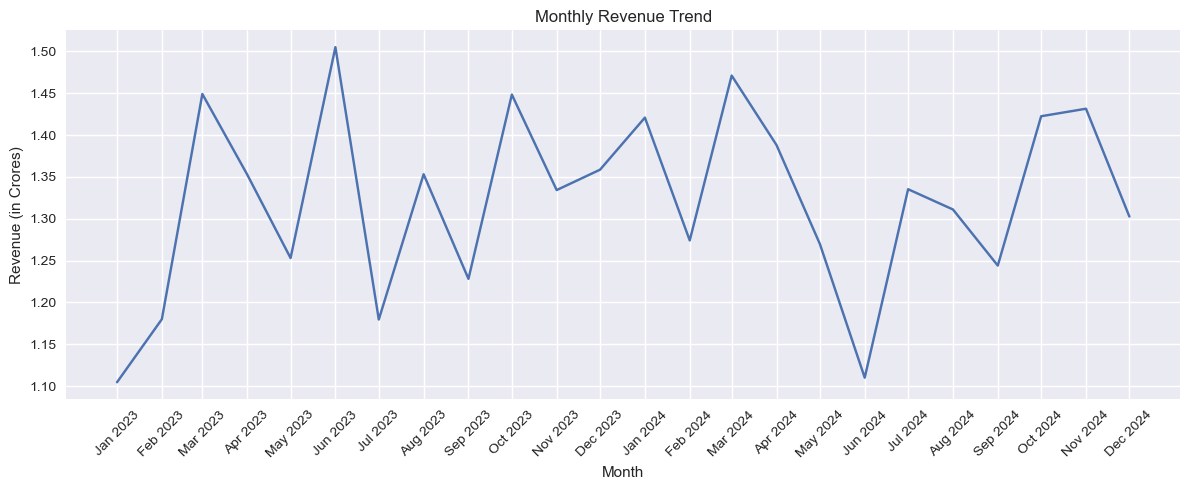

In [14]:
# Group monthly revenue
monthly_revenue = (
    data
    .groupby(data['Order Date'].dt.to_period('M'))['Revenue']
    .sum()
)

# Convert index to timestamp
monthly_revenue.index = monthly_revenue.index.to_timestamp()

# Convert revenue to Crores
monthly_revenue_crore = monthly_revenue / 10_000_000

plt.figure(figsize=(12,5))

plt.plot(monthly_revenue.index, monthly_revenue_crore.values)

plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (in Crores)")

plt.xticks(
    monthly_revenue.index,
    monthly_revenue.index.strftime('%b %Y'),
    rotation=45
)

plt.grid(True)
plt.tight_layout()
plt.show()

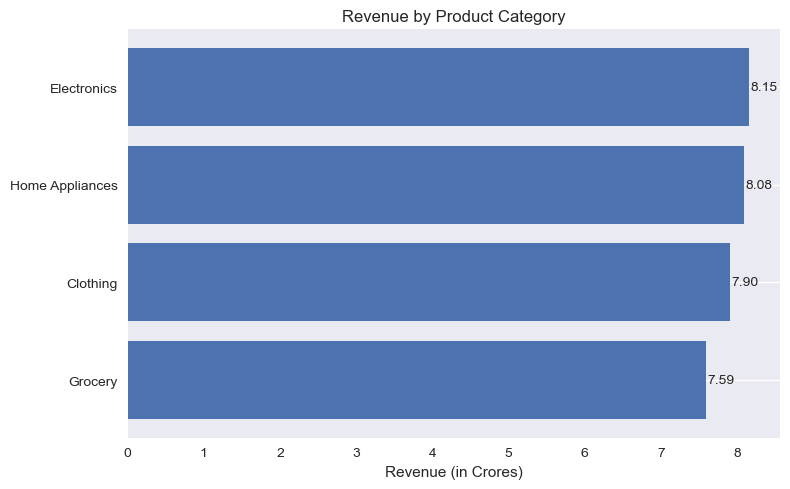

In [15]:
category_revenue = (
    data
    .groupby('Product Category')['Revenue']
    .sum()
    .sort_values(ascending=True)
)

category_revenue_crore = category_revenue / 10_000_000

plt.figure(figsize=(8,5))

bars = plt.barh(category_revenue_crore.index, category_revenue_crore.values)

plt.title("Revenue by Product Category")
plt.xlabel("Revenue (in Crores)")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02, 
             bar.get_y() + bar.get_height()/2,
             f"{width:.2f}",
             va='center')

plt.grid(axis='x')
plt.tight_layout()
plt.show()

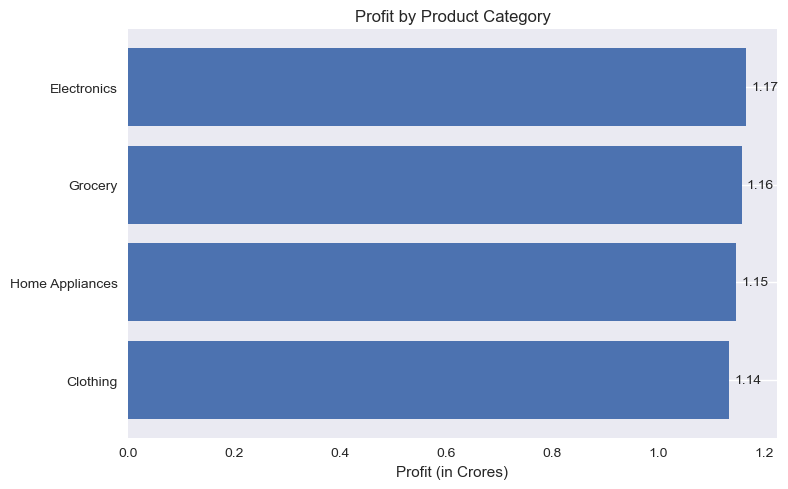

In [16]:
# Profit by Category
category_profit = (
    data
    .groupby('Product Category')['Profit']
    .sum()
    .sort_values(ascending=True)
)

category_profit_crore = category_profit / 10_000_000

plt.figure(figsize=(8,5))

bars = plt.barh(category_profit_crore.index, category_profit_crore.values)

plt.title("Profit by Product Category")
plt.xlabel("Profit (in Crores)")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01,
             bar.get_y() + bar.get_height()/2,
             f"{width:.2f}",
             va='center')

plt.grid(axis='x')
plt.tight_layout()
plt.show()

/var/folders/c7/pjn5fzf55b5fj4ml_2md5k7r0000gn/T/ipykernel_5392/4165583569.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['Profit'].sum() / x['Revenue'].sum())


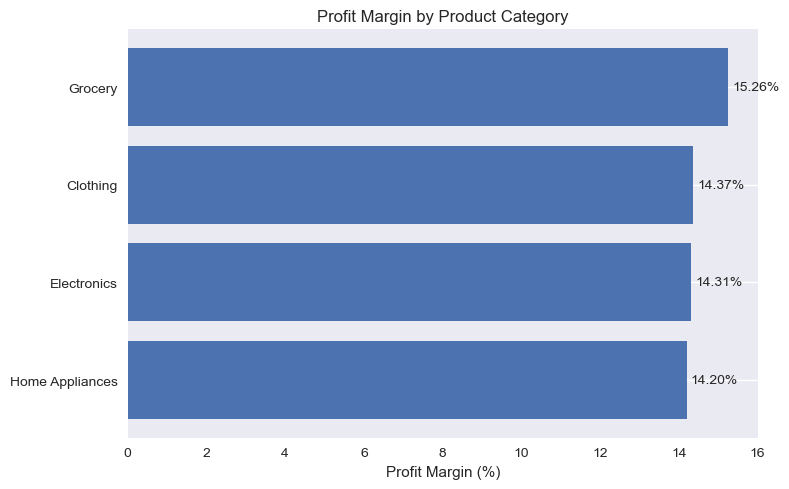

In [17]:
# Profit margin by category
category_margin = (
    data
    .groupby('Product Category')
    .apply(lambda x: x['Profit'].sum() / x['Revenue'].sum())
    .sort_values(ascending=True)
)

plt.figure(figsize=(8,5))

bars = plt.barh(category_margin.index, category_margin.values * 100)

plt.title("Profit Margin by Product Category")
plt.xlabel("Profit Margin (%)")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1,
             bar.get_y() + bar.get_height()/2,
             f"{width:.2f}%",
             va='center')

plt.grid(axis='x')
plt.tight_layout()
plt.show()

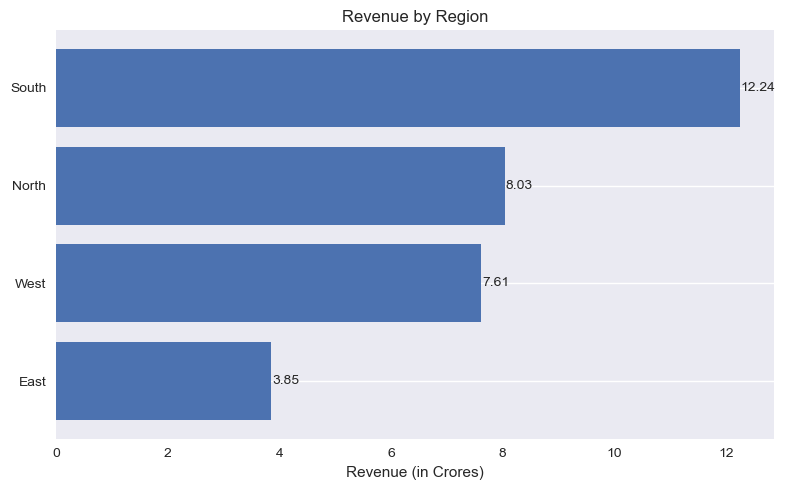

In [18]:
# Revenue by region
region_revenue = (
    data
    .groupby('Region')['Revenue']
    .sum()
    .sort_values(ascending=True)
)

region_revenue_crore = region_revenue / 10_000_000

plt.figure(figsize=(8,5))

bars = plt.barh(region_revenue_crore.index, region_revenue_crore.values)

plt.title("Revenue by Region")
plt.xlabel("Revenue (in Crores)")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02,
             bar.get_y() + bar.get_height()/2,
             f"{width:.2f}",
             va='center')

plt.grid(axis='x')
plt.tight_layout()
plt.show()

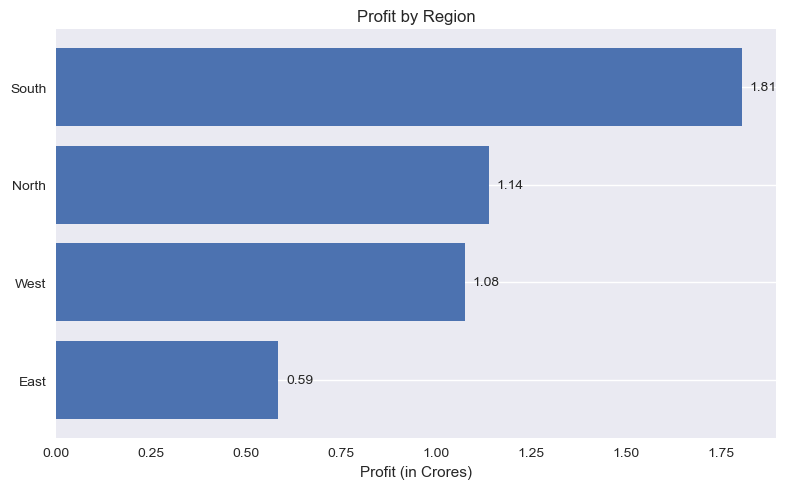

In [19]:
#Profit by region 
region_profit = (
    data
    .groupby('Region')['Profit']
    .sum()
    .sort_values(ascending=True)
)

region_profit_crore = region_profit / 10_000_000

plt.figure(figsize=(8,5))

bars = plt.barh(region_profit_crore.index, region_profit_crore.values)

plt.title("Profit by Region")
plt.xlabel("Profit (in Crores)")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02,
             bar.get_y() + bar.get_height()/2,
             f"{width:.2f}",
             va='center')

plt.grid(axis='x')
plt.tight_layout()
plt.show()

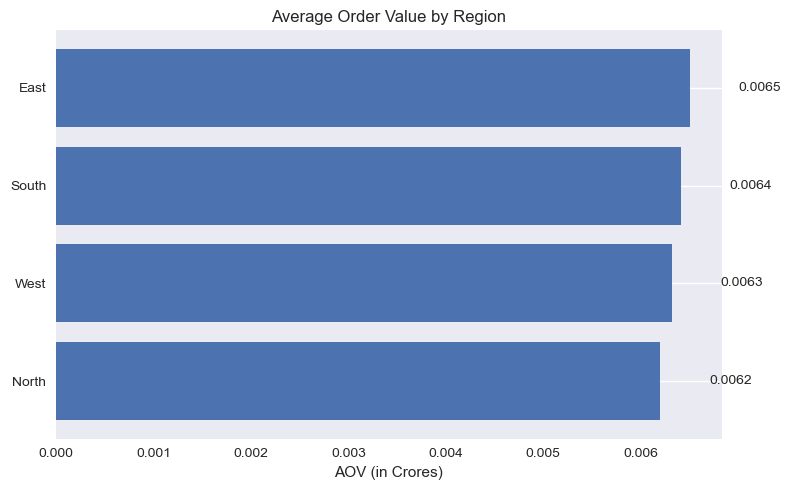

In [20]:
# Average Order Value by Region
region_orders = (
    data
    .groupby('Region')
    .agg({
        'Revenue': 'sum',
        'Order ID': 'nunique'
    })
)

region_orders['AOV'] = region_orders['Revenue'] / region_orders['Order ID']

region_orders = region_orders.sort_values('AOV')

region_orders_crore = region_orders['AOV'] / 10_000_000

plt.figure(figsize=(8,5))

bars = plt.barh(region_orders.index, region_orders_crore.values)

plt.title("Average Order Value by Region")
plt.xlabel("AOV (in Crores)")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.0005,
             bar.get_y() + bar.get_height()/2,
             f"{width:.4f}",
             va='center')

plt.grid(axis='x')
plt.tight_layout()
plt.show()

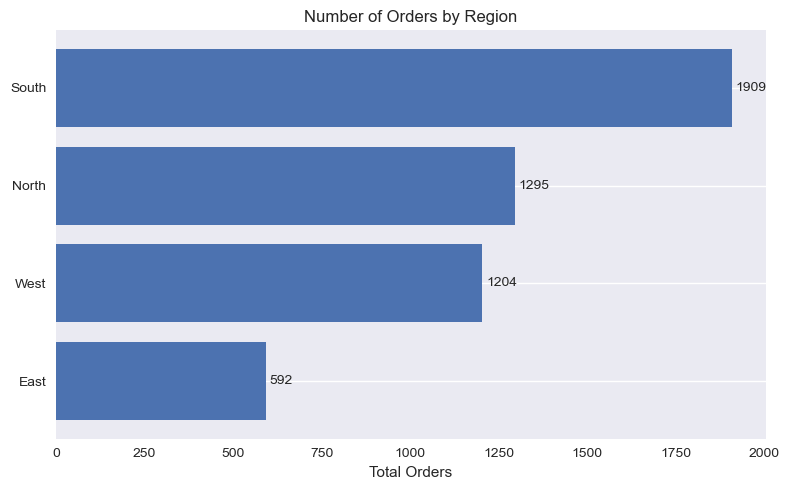

In [21]:
# Number of Orders by region
region_order_count = (
    data
    .groupby('Region')['Order ID']
    .nunique()
    .sort_values(ascending=True)
)

plt.figure(figsize=(8,5))

bars = plt.barh(region_order_count.index, region_order_count.values)

plt.title("Number of Orders by Region")
plt.xlabel("Total Orders")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10,
             bar.get_y() + bar.get_height()/2,
             f"{int(width)}",
             va='center')

plt.grid(axis='x')
plt.tight_layout()
plt.show()

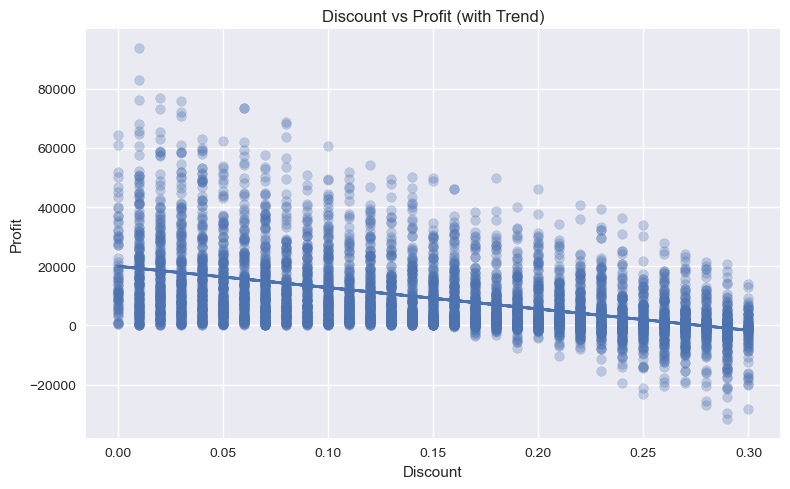

In [22]:
import numpy as np

plt.figure(figsize=(8,5))

plt.scatter(
    data['Discount'],
    data['Profit'],
    alpha=0.3
)

# Add regression line
z = np.polyfit(data['Discount'], data['Profit'], 1)
p = np.poly1d(z)

plt.plot(data['Discount'], p(data['Discount']), linewidth=2)

plt.title("Discount vs Profit (with Trend)")
plt.xlabel("Discount")
plt.ylabel("Profit")

plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
#Corelation
correlation = data['Discount'].corr(data['Profit'])
print("Correlation between Discount and Profit:", round(correlation, 3))

Correlation between Discount and Profit: -0.489


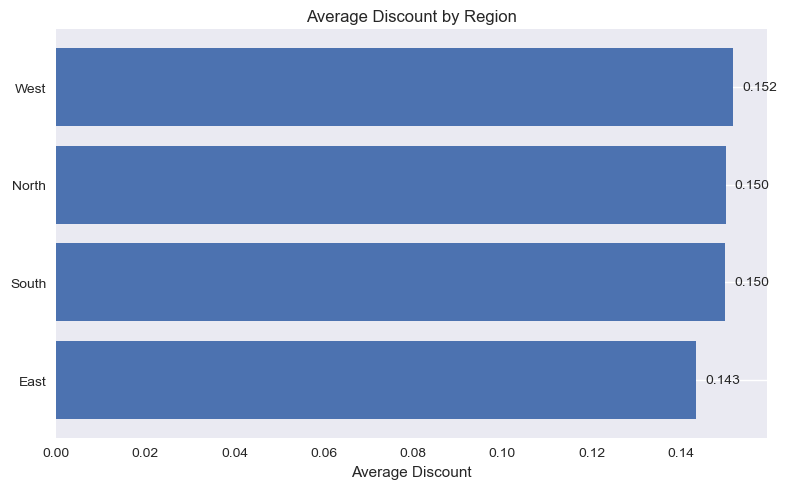

In [24]:
# Average Discount by Region
region_discount = (
    data
    .groupby('Region')['Discount']
    .mean()
    .sort_values(ascending=True)
)

plt.figure(figsize=(8,5))

bars = plt.barh(region_discount.index, region_discount.values)

plt.title("Average Discount by Region")
plt.xlabel("Average Discount")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.002,
             bar.get_y() + bar.get_height()/2,
             f"{width:.3f}",
             va='center')

plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [25]:
# Create age bins
data['Age Group'] = pd.cut(
    data['Age'],
    bins=[18, 25, 35, 45, 55, 65],
    labels=['18-25', '26-35', '36-45', '46-55', '56-65']
)

/var/folders/c7/pjn5fzf55b5fj4ml_2md5k7r0000gn/T/ipykernel_5392/2126373234.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Age Group')['Revenue']
/var/folders/c7/pjn5fzf55b5fj4ml_2md5k7r0000gn/T/ipykernel_5392/2126373234.py:26: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


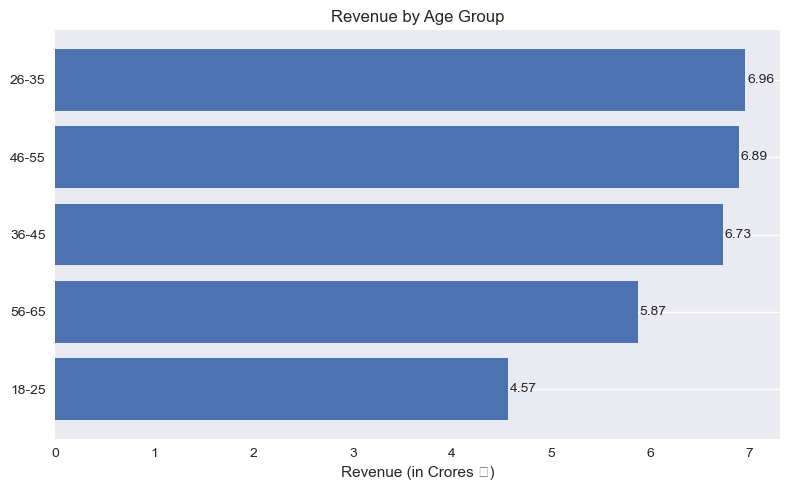

In [26]:
# REvenue by Age Groups
age_revenue = (
    data
    .groupby('Age Group')['Revenue']
    .sum()
    .sort_values(ascending=True)
)

age_revenue_crore = age_revenue / 10_000_000

plt.figure(figsize=(8,5))

bars = plt.barh(age_revenue_crore.index, age_revenue_crore.values)

plt.title("Revenue by Age Group")
plt.xlabel("Revenue (in Crores ₹)")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02,
             bar.get_y() + bar.get_height()/2,
             f"{width:.2f}",
             va='center')

plt.grid(axis='x')
plt.tight_layout()
plt.show()

/var/folders/c7/pjn5fzf55b5fj4ml_2md5k7r0000gn/T/ipykernel_5392/3064417439.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Age Group')['Profit']


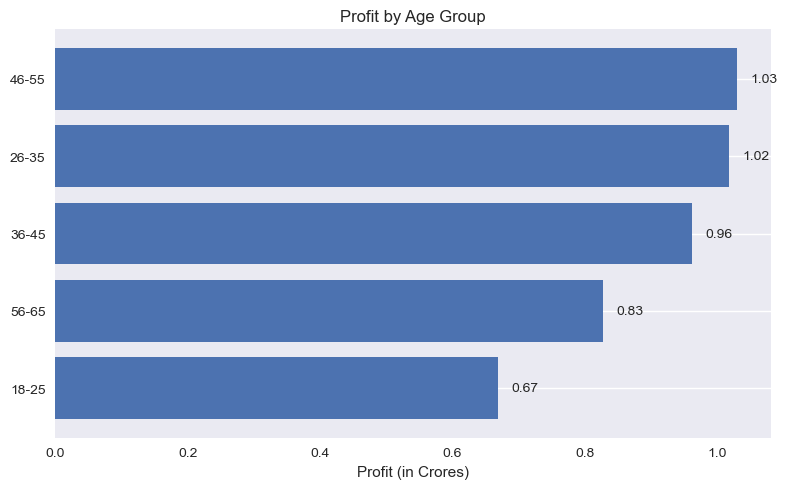

In [27]:
# Profit by Age Group
age_profit = (
    data
    .groupby('Age Group')['Profit']
    .sum()
    .sort_values(ascending=True)
)

age_profit_crore = age_profit / 10_000_000

plt.figure(figsize=(8,5))

bars = plt.barh(age_profit_crore.index, age_profit_crore.values)

plt.title("Profit by Age Group")
plt.xlabel("Profit (in Crores)")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02,
             bar.get_y() + bar.get_height()/2,
             f"{width:.2f}",
             va='center')

plt.grid(axis='x')
plt.tight_layout()
plt.show()

/var/folders/c7/pjn5fzf55b5fj4ml_2md5k7r0000gn/T/ipykernel_5392/2206115146.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Age Group')
/var/folders/c7/pjn5fzf55b5fj4ml_2md5k7r0000gn/T/ipykernel_5392/2206115146.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['Profit'].sum() / x['Revenue'].sum())


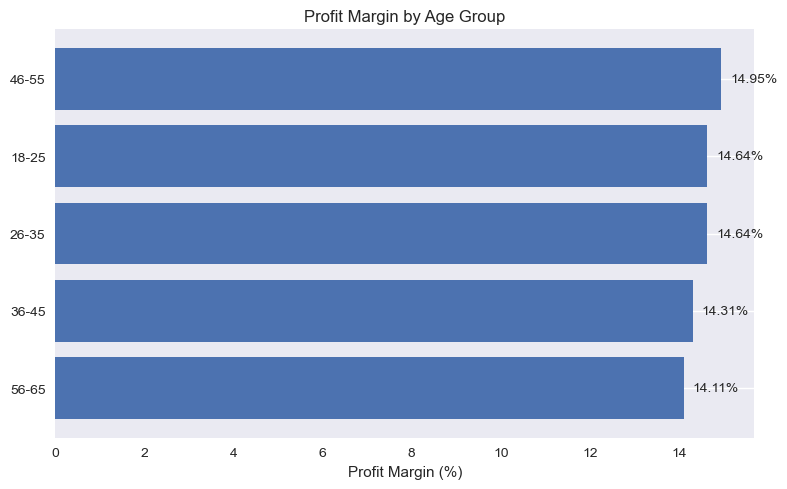

In [28]:
# Profit Margin by Age Group
age_margin = (
    data
    .groupby('Age Group')
    .apply(lambda x: x['Profit'].sum() / x['Revenue'].sum())
    .sort_values(ascending=True)
)

plt.figure(figsize=(8,5))

bars = plt.barh(age_margin.index, age_margin.values * 100)

plt.title("Profit Margin by Age Group")
plt.xlabel("Profit Margin (%)")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.2,
             bar.get_y() + bar.get_height()/2,
             f"{width:.2f}%",
             va='center')

plt.grid(axis='x')
plt.tight_layout()
plt.show()


---
# 📌 Executive Summary

### 🔍 Key Business Insights

1. South region drives the highest revenue and order volume.
2. The 46–55 age group is the most profitable customer segment.
3. The 26–35 age group generates the highest revenue.
4. Higher discounts negatively impact profitability.
5. East region underperforms compared to other regions.

---

## 🛠 Tools Used
- Python
- Pandas
- NumPy
- Matplotlib

---

This project demonstrates applied business analytics using real-world style exploratory data analysis.



---
# 📊 Revenue Contribution Analysis

This section calculates percentage contribution of each region to total revenue 
to understand concentration risk and growth dependency.


In [ ]:

region_contribution = data.groupby('Region')['Revenue'].sum()
region_contribution_pct = (region_contribution / region_contribution.sum()) * 100
region_contribution_pct.sort_values(ascending=False)



---
# 🏆 Top 5 Most Profitable Products

Identifying top-performing products to support inventory and marketing decisions.


In [ ]:

top_products = (
    data.groupby('Product Category')['Profit']
    .sum()
    .sort_values(ascending=False)
)

top_products.head(5)



---
# 📈 Profit Distribution Analysis

Analyzing distribution of transaction-level profit to understand risk of loss-making orders.


In [ ]:

plt.figure(figsize=(8,5))
plt.hist(data['Profit'], bins=40)
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()



---
# 🔮 Basic Revenue Forecast (Moving Average)

A simple 3-month moving average is applied to identify short-term revenue trend direction.


In [ ]:

monthly_revenue = (
    data.groupby(data['Order Date'].dt.to_period('M'))['Revenue'].sum()
)

monthly_revenue.index = monthly_revenue.index.to_timestamp()
moving_avg = monthly_revenue.rolling(window=3).mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_revenue.index, monthly_revenue/10_000_000, label='Actual Revenue')
plt.plot(moving_avg.index, moving_avg/10_000_000, label='3-Month Moving Avg')

plt.title("Revenue Trend with 3-Month Moving Average")
plt.xlabel("Month")
plt.ylabel("Revenue (in Crores ₹)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



---
# 🚀 Strategic Business Recommendations

Based on the analysis:

1. **Increase marketing allocation in South region** due to strong order volume and consistent revenue performance.
2. **Target 46–55 age group with premium offerings**, as this segment generates highest profit margin.
3. **Optimize discount strategy** by limiting discounts above 20%, as correlation (-0.489) indicates profitability erosion.
4. **Develop growth campaigns for East region** to improve market penetration.
5. **Leverage high-margin segments for upselling and cross-selling strategies.**

These recommendations align with observed revenue, profit, and margin patterns.
